In [18]:
import pandas
import os.path
from glob import glob
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from matplotlib.colors import Normalize
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm
from matplotlib.patches import Patch
from matplotlib.lines import Line2D




In [19]:
#Uvozimo tabele
paths = glob("tables/*.csv")
league_paths = [paths[0:4], paths[4:9], paths[9:13], paths[13:17], paths[17:]]
leagues = ["bundesliga", "laliga", "ligue 1", "premier league", "serie a"]

#Iz tabel izluščimo prednost prvouvščenega in njegovo povprečje točk na tekmo
result = pandas.DataFrame({"League": [], "PTS Difference" : [], "Points Per Game" : []})
for league, name in zip(league_paths, leagues):
    for el in league:
        tabela = pandas.read_csv(el, index_col = 0)
        pts_diff = tabela.iloc[0]["PTS"] - tabela.iloc[1]["PTS"]
        ppg = tabela.iloc[0]["PTS"]/(tabela.iloc[0]["Wins"] + tabela.iloc[0]["Losses"] + tabela.iloc[0]["Draws"])
        new_row = {"League" : name, "PTS Difference" : pts_diff, "Points Per Game" : ppg}
        result = result.append(new_row, ignore_index=True)
result

,League,PTS Difference,Points Per Game
0,bundesliga,6.0,2.400000
1,bundesliga,21.0,2.470588
2,bundesliga,2.0,2.294118
3,bundesliga,13.0,2.411765
4,laliga,1.0,2.394737
5,laliga,3.0,2.447368
6,laliga,14.0,2.447368
7,laliga,11.0,2.289474
8,laliga,5.0,2.289474
9,ligue 1,31.0,2.526316


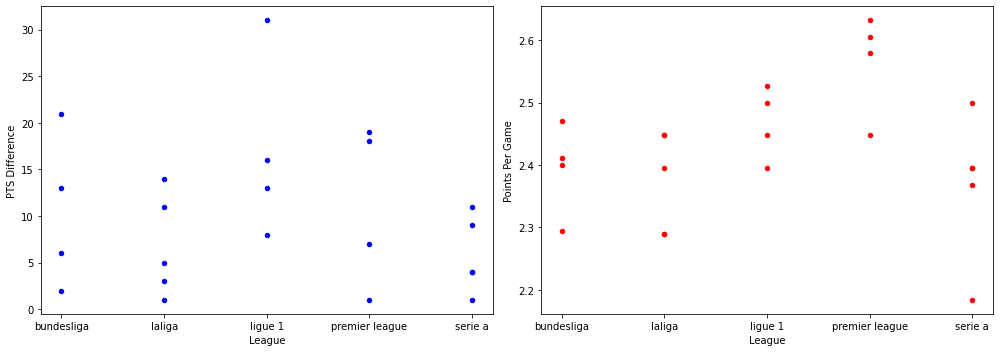

In [20]:
def graphs_1(data):
    _, (ax_1, ax_2) = plt.subplots(1, 2, figsize = (14, 5))
    data.plot.scatter("League", "PTS Difference", ax = ax_1, color = "blue")
    data.plot.scatter("League", "Points Per Game", ax = ax_2, color = "red")
    plt.tight_layout()

graphs_1(result)

#kako das na isti graf pa da so razlicne barve razlicna liga?

Levi graf prikazuje prednost prvouvrščenega pred naslednjim zasledovalcem na koncu sezone, desni graf pa prikazuje povprečje točk na tekmo prvouvrščenega. Velika razlika med 1. in 2. mestom nakazuje, da je bila ena ekipa izrazito boljša od konkurence. Število točk na tekmo pa je boljši pokazatelj kvalitete, saj je neodvisen od drugouvrščenega, ampak od celotne lige. Grafa nam data okvirno idejo kvalitete različnih klubov v ligi. Kot primer si poglejmo angleško Premier ligo in francosko Ligue 1. V angleški ligi opazimo višje povprečje točk na tekmo zmagovalca, med tem ko v francoski ligi opazimo višjo razliko med zmagovalcem in drugouvrščenim. Iz tega lahko sklepamo, da so v francoski ligi "povprečni klubi" bolj izenačeni, vodilnemu pa zato zadostuje manjša učinkovitost, da doseže enak ali večji naskok pred drugouvrščenim. Izpostavimo pa tudi to, da sta načeloma oba podatka med seboj povezana. Iz večje učinkovitosti sledi večje skupno število točk, in tako večja verjetnost za večjo prednost na vrhu lestvice.

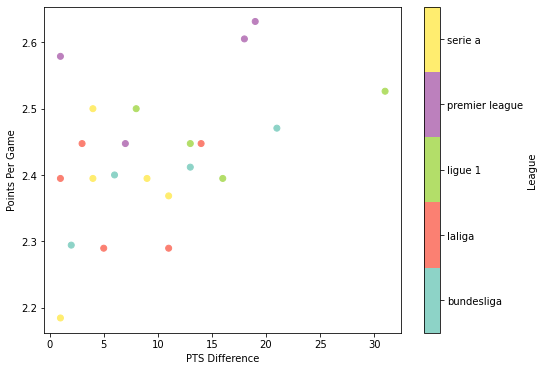

In [21]:
league_dict = {"bundesliga" : 1, "laliga" : 2, "ligue 1" : 3, "premier league" : 4, "serie a" : 5}
def graph_1_colors(data):
    x = data["PTS Difference"].tolist()
    y = data["Points Per Game"].tolist()
    c = [league_dict[x] for x in result["League"].tolist()]
    f = plt.figure()
    f.set_figwidth(8)
    f.set_figheight(6)
    plt.scatter(x, y, c = c, cmap = plt.cm.get_cmap("Set3", 5))
    cbar = plt.colorbar(orientation = "vertical")
    cbar.set_label(label="League")
    cbar.set_ticks([1.4, 2.2, 3, 3.8, 4.6])
    cbar.set_ticklabels(["bundesliga", "laliga", "ligue 1", "premier league", "serie a"])
    plt.xlabel("PTS Difference")
    plt.ylabel("Points Per Game")
    plt.show()
graph_1_colors(result)

<AxesSubplot:xlabel='League', ylabel='Goals per Game'>

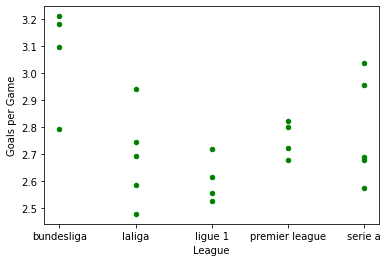

In [22]:
paths_2 = glob("data/*.csv")
league_paths_2 = [paths_2[0:4], paths_2[4:9], paths_2[9:13], paths_2[13:17], paths_2[17:]]

result_2 = pandas.DataFrame({"League": [], "Goals per Game" : []})
for league, name in zip(league_paths_2, leagues):
    for el in league:
        tabela = pandas.read_csv(el, index_col = 0)
        gpg = tabela["goals"].mean() + tabela["opponent goals"].mean()
        new_row = {"League" : name, "Goals per Game" : gpg}
        result_2 = result_2.append(new_row, ignore_index=True)
        
result_2.plot.scatter("League", "Goals per Game", color = "green")


Zgornji graf prikazuje povprečje golov na tekmo v posameznih ligah (vsaka točka predstavlja drugo sezono). Po pričakovanjih lahko opazimo razlike, v nemški ligi je povprečje golov precej višje kot v ostalih ligah, v angleški Premier ligi pa je najbolj konstantno. Treba je omeniti, da število golov na tekmo ne nakazuje razlike v kvaliteti, temveč predvsem v stilu igre. V Nemčiji, kjer ekipe dosegajo več golov na tekmo, lahko sklepamo, da je bolj popularen agresiven in napadalen stil igre, ki omogoča več doseženih golov (hkrati pa ekipe tudi bolj izpostavi protinapadom in prejetim zadetkom).

In [23]:
#Naredimo tabelo s korelacijskimi koeficienti (po Pearsonovi metodi)
example = pandas.read_csv("tables/bundesliga-2018-2019.csv")
corr_pearson = example.corr(method = "pearson")
corr_pearson

,PTS,Goal Difference,Goals,Goals against,Wins,Draws,Losses
PTS,1.000000,0.979109,0.945922,-0.890307,0.991760,-0.193992,-0.963018
Goal Difference,0.979109,1.000000,0.957422,-0.921019,0.958079,-0.090678,-0.970162
Goals,0.945922,0.957422,1.000000,-0.769354,0.933409,-0.147367,-0.920865
Goals against,-0.890307,-0.921019,-0.769354,1.000000,-0.860654,0.001820,0.904318
Wins,0.991760,0.958079,0.933409,-0.860654,1.000000,-0.318068,-0.920566
Draws,-0.193992,-0.090678,-0.147367,0.001820,-0.318068,1.000000,-0.077502
Losses,-0.963018,-0.970162,-0.920865,0.904318,-0.920566,-0.077502,1.000000


In [24]:
#Tabela s korelacijskimi koeficienti (Spearmanova metoda)
corr_spearman = example.corr(method = "spearman")
corr_spearman

,PTS,Goal Difference,Goals,Goals against,Wins,Draws,Losses
PTS,1.000000,0.954522,0.912099,-0.903259,0.996893,-0.261416,-0.912571
Goal Difference,0.954522,1.000000,0.940569,-0.894520,0.939931,-0.085872,-0.952948
Goals,0.912099,0.940569,1.000000,-0.774961,0.910365,-0.124683,-0.906363
Goals against,-0.903259,-0.894520,-0.774961,1.000000,-0.890100,-0.012055,0.912526
Wins,0.996893,0.939931,0.910365,-0.890100,1.000000,-0.301856,-0.895284
Draws,-0.261416,-0.085872,-0.124683,-0.012055,-0.301856,1.000000,-0.102733
Losses,-0.912571,-0.952948,-0.906363,0.912526,-0.895284,-0.102733,1.000000


Zgornji tabeli prikazujeta korelacijske koeficiente med izbranimi statističnimi kategorijami, izračunani po Pearsonovi (zgornja tabela) in Spearmanovi (spodnja tabela). Za vzorec sem izbral nemško Bundesligo, in sicer sezono 2018/2019. Zanima me, kako so te statistične kategorije povezane med seboj. Po pričakovanjih vidimo, da so dosežene točke skoraj linearno odvisne od števila zmag (čeprav tudi remiji prinesejo eno točko). Ko smo ravno pri remijih, opazimo, da kar precej negativno vplivajo na število točk, čeprav prinesejo ekipi eno točko, saj ekipa ob remiju "zamudi zmago" in tako ne pridobi potencialnih 3 točk. Izmed vsega pa me najbolj zanima slednje; doseženi in prejeti goli imajo seveda ravno nasproten vpliv na število točk. Ali je mogoče, da vpliva nista nasprotno enaka, torej da ima ena izmed kategorij večji vpliv na število točk kot druga?

Za bolj koristne informacije bom naredil eno tabelo korelacijskih koeficientov (kot prikazano zgoraj) za vsako sezono, nato pa korelacijske koeficiente primerjal in izračunal povprečja. Tako bom dobil odgovor na moje vprašanje.

In [25]:
#Dve tabeli s korelacijskimi koeficienti izbranih kategorij za vsako sezono
result_pearson = pandas.DataFrame({"League": [], "Goals/PTS" : [], "Goals Against/PTS" : [], "Wins/PTS" : [], "Draws/PTS" : [], "Losses/PTS" : []})
result_spearman = pandas.DataFrame({"League": [], "Goals/PTS" : [], "Goals Against/PTS" : [], "Wins/PTS" : [], "Draws/PTS" : [], "Losses/PTS" : []})
for league, name in zip(league_paths, leagues):
    for el in league:
        tabela = pandas.read_csv(el, index_col = 0)
        corr_pearson = tabela.corr(method = "pearson")
        corr_spearman = tabela.corr(method = "spearman")
        new_row_pearson = {"League": name, "Goals/PTS" : corr_pearson.at["Goals", "PTS"], "Goals Against/PTS" : corr_pearson.at["Goals against", "PTS"], "Wins/PTS" : corr_pearson.at["Wins", "PTS"], "Draws/PTS" : corr_pearson.at["Draws", "PTS"], "Losses/PTS" : corr_pearson.at["Losses", "PTS"]}
        new_row_spearman = {"League": name, "Goals/PTS" : corr_spearman.at["Goals", "PTS"], "Goals Against/PTS" : corr_spearman.at["Goals against", "PTS"], "Wins/PTS" : corr_spearman.at["Wins", "PTS"], "Draws/PTS" : corr_spearman.at["Draws", "PTS"], "Losses/PTS" : corr_spearman.at["Losses", "PTS"]}
        result_pearson = result_pearson.append(new_row_pearson, ignore_index=True)
        result_spearman = result_spearman.append(new_row_spearman, ignore_index=True)


,League,Goals/PTS,Goals Against/PTS,Wins/PTS,Draws/PTS,Losses/PTS
0,bundesliga,0.904024,-0.771299,0.982394,-0.135483,-0.924430
1,bundesliga,0.887940,-0.797286,0.986479,-0.440874,-0.915320
2,bundesliga,0.945922,-0.890307,0.991760,-0.193992,-0.963018
3,bundesliga,0.917649,-0.959011,0.988938,-0.280389,-0.945212
4,laliga,0.842036,-0.833289,0.992527,-0.592257,-0.947539
5,laliga,0.872530,-0.854720,0.996132,-0.408174,-0.980560
6,laliga,0.860991,-0.775547,0.988030,0.091837,-0.958004
7,laliga,0.756603,-0.802106,0.984146,-0.180907,-0.928402
8,laliga,0.882156,-0.805104,0.982484,-0.084175,-0.928958
9,ligue 1,0.836883,-0.836834,0.980097,-0.248093,-0.901607


In [35]:
def grafi_corr(stat):
    fig, (ax1, ax2, ) = plt.subplots(1,2, figsize=(10,5)) 
    result_pearson.plot.scatter('League', stat, color = 'black', ax=ax1, label = 'Pearson')
    result_spearman.plot.scatter('League', stat, color = 'blue', ax=ax2, label = 'Spearman')
    plt.tight_layout()


interactive(children=(Dropdown(description='stat', options=('Goals/PTS', 'Goals Against/PTS', 'Wins/PTS', 'Dra…

<function __main__.grafi_corr(stat)>

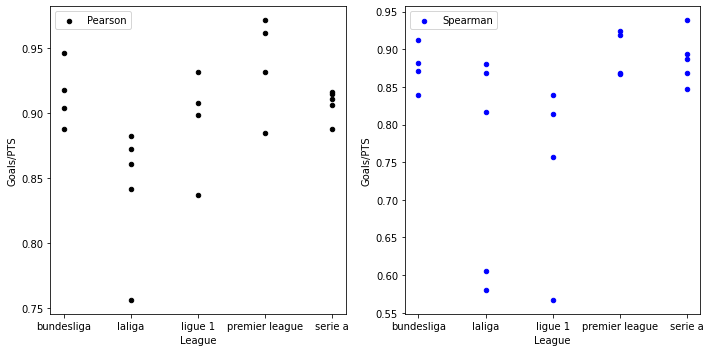

In [34]:
widgets.interact(grafi_corr, stat=list(result_pearson)[1:])